In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Remove temperature, humidity, moisture, soil type

In [5]:
cross_val_scores=dict()
test_scores=dict()
train_scores=dict()

In [118]:
data=pd.read_csv("Dataset/fertilizer/Fertilizer Prediction.csv")

In [119]:
data.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [120]:
print(data.columns)

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [121]:
data=data.drop(['Temparature', 'Humidity ', 'Moisture', 'Soil Type'],axis=1)

In [122]:
data.head()


,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,Maize,37,0,0,Urea
1,Sugarcane,12,0,36,DAP
2,Cotton,7,9,30,14-35-14
3,Tobacco,22,0,20,28-28
4,Paddy,35,0,0,Urea


<AxesSubplot:>

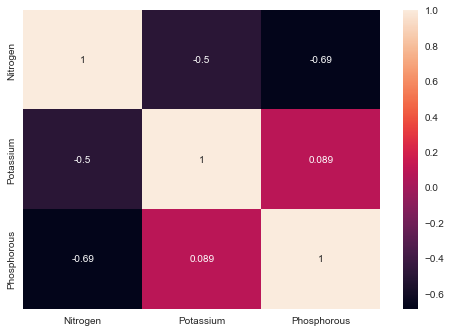

In [123]:
plt.style.use('seaborn')
sns.heatmap(data.corr(method='pearson'),annot=True)

#### MAKE STRING DATA CATEGORICAL

In [124]:
def convert_to_dict(column):
    dictionary=dict()
    i=1
    for x in column:
        dictionary[x]=i
        i=i+1
    return dictionary

In [125]:
# dict_soil_type=convert_to_dict(data['Soil Type'].unique())
dict_crop=convert_to_dict(data['Crop Type'].unique())
dict_fertilizer=convert_to_dict(data['Fertilizer Name'].unique())

In [126]:
print(dict_crop)
print(dict_fertilizer)

{'Maize': 1, 'Sugarcane': 2, 'Cotton': 3, 'Tobacco': 4, 'Paddy': 5, 'Barley': 6, 'Wheat': 7, 'Millets': 8, 'Oil seeds': 9, 'Pulses': 10, 'Ground Nuts': 11}
{'Urea': 1, 'DAP': 2, '14-35-14': 3, '28-28': 4, '17-17-17': 5, '20-20': 6, '10-26-26': 7}


In [127]:
x_train=data
# x_train['Soil Type']=x_train['Soil Type'].apply(lambda x:dict_soil_type[x])
x_train['Crop Type']=x_train['Crop Type'].apply(lambda x:dict_crop[x])   
x_train['Fertilizer Name']=x_train['Fertilizer Name'].apply(lambda x:dict_fertilizer[x])   
y_train=data['Fertilizer Name']
x_train=x_train.drop('Fertilizer Name',axis=1)


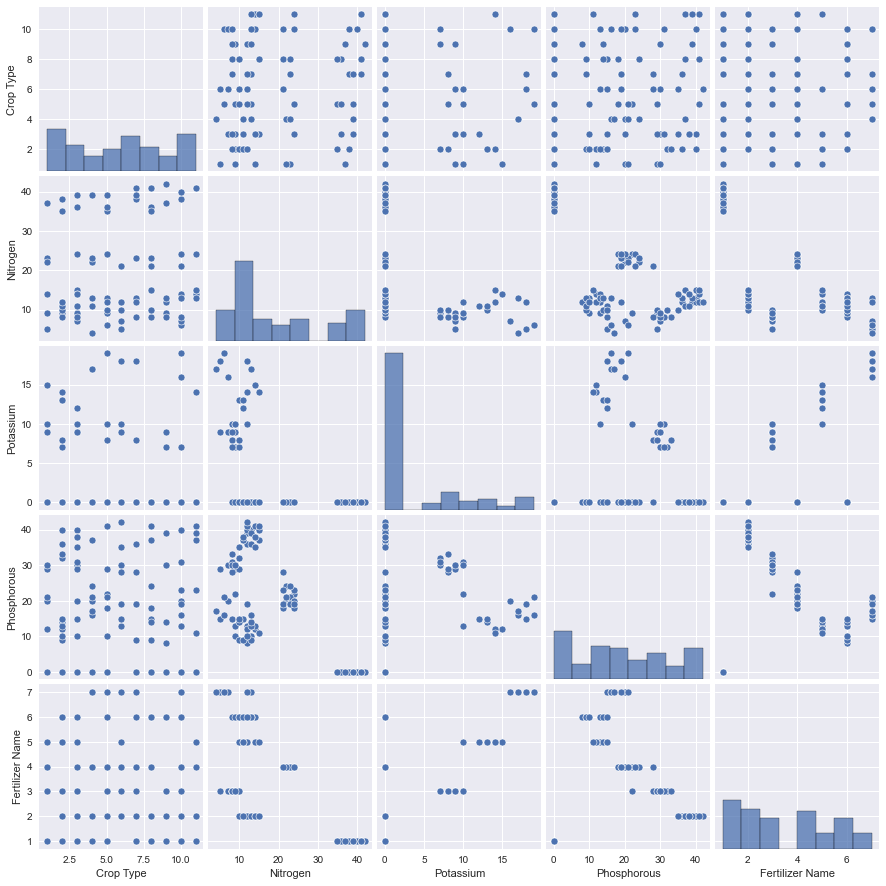

In [128]:
sns.pairplot(data)

In [129]:
data.head()

,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,1,37,0,0,1
1,2,12,0,36,2
2,3,7,9,30,3
3,4,22,0,20,4
4,5,35,0,0,1


In [130]:
x_train.head()

,Crop Type,Nitrogen,Potassium,Phosphorous
0,1,37,0,0
1,2,12,0,36
2,3,7,9,30
3,4,22,0,20
4,5,35,0,0


In [131]:
y_train.head()

0    1
1    2
2    3
3    4
4    1
Name: Fertilizer Name, dtype: int64

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Crop Type        99 non-null     int64
 1   Nitrogen         99 non-null     int64
 2   Potassium        99 non-null     int64
 3   Phosphorous      99 non-null     int64
 4   Fertilizer Name  99 non-null     int64
dtypes: int64(5)
memory usage: 4.0 KB


In [134]:
data.shape

(99, 5)

In [135]:
data.describe()

,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,5.848485,18.909091,3.383838,18.606061,3.393939
std,3.117965,11.599693,5.814667,13.476978,1.952592
min,1.000000,4.000000,0.000000,0.000000,1.000000
25%,3.000000,10.000000,0.000000,9.000000,2.000000
50%,6.000000,13.000000,0.000000,19.000000,3.000000
75%,8.000000,24.000000,7.500000,30.000000,5.000000
max,11.000000,42.000000,19.000000,42.000000,7.000000


In [136]:
data.nunique()

Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

### TRAIN TEST SPLIT

In [137]:
data=np.array(data)
data=data.astype('float64')


In [138]:
x=data[:,:-1]
print(x.shape)

(99, 4)


In [139]:
y=data[:,-1]
print(y.shape)

(99,)


In [140]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)

In [141]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(66, 4) (66,)
(33, 4) (33,)


### NORMALIZE OUR DATA

In [142]:
def normalize(x_train,x_test,index):
    m=x_train[:,index].mean()
    s=x_train[:,index].std()
    x_train[:,index]=(x_train[:,index]-m)/s
    x_test[:,index]=(x_test[:,index]-m)/s
    return x_train,x_test,m,s
    

In [144]:
indices_continuous=[1,2,3]
indices_categorical=[0]
mean_dict=dict()
std_dict=dict()

In [145]:
for x in indices_continuous:
    x_train,x_test,m,s=normalize(x_train,x_test,x)
    mean_dict[x]=m
    std_dict[x]=s
for x in indices_categorical:
    mean_dict[x]=0;
    std_dict[x]=1
    

In [146]:
mean_dict,std_dict

({1: 18.651515151515152, 2: 3.3181818181818183, 3: 17.393939393939394, 0: 0},
 {1: 11.674230133908935, 2: 5.5872123772736915, 3: 13.08350660515888, 0: 1})

## ML MODELS

### SVM

In [147]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import multiprocessing

In [148]:
cpus=multiprocessing.cpu_count()
print(cpus)

8


In [149]:
parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[1,1.5,2,2.5,3,4,5,6,7]}

In [150]:
model=svm.SVC()

In [151]:
gs=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=3,n_jobs=cpus)
gs.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=8,
             param_grid={'C': [1, 1.5, 2, 2.5, 3, 4, 5, 6, 7],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [152]:
gs.best_estimator_

SVC(C=1, kernel='linear')

In [153]:
gs.best_score_

0.9696969696969697

In [154]:
gs.best_params_

{'C': 1, 'kernel': 'linear'}

In [155]:
final_svm=svm.SVC(kernel='linear',C=1,random_state=0)
final_svm.fit(x_train,y_train)
print(final_svm.score(x_train,y_train))
print(final_svm.score(x_test,y_test))

1.0
1.0


In [156]:
scores=cross_val_score(final_svm,x_train,y_train,cv=3)
print(scores,scores.mean())
cross_val_scores['SVM']=scores.mean()

[1.         0.95454545 0.95454545] 0.9696969696969697


              precision    recall  f1-score   support

         1.0      1.000     1.000     1.000         7
         2.0      1.000     1.000     1.000         8
         3.0      1.000     1.000     1.000         4
         4.0      1.000     1.000     1.000         8
         5.0      1.000     1.000     1.000         2
         6.0      1.000     1.000     1.000         1
         7.0      1.000     1.000     1.000         3

    accuracy                          1.000        33
   macro avg      1.000     1.000     1.000        33
weighted avg      1.000     1.000     1.000        33



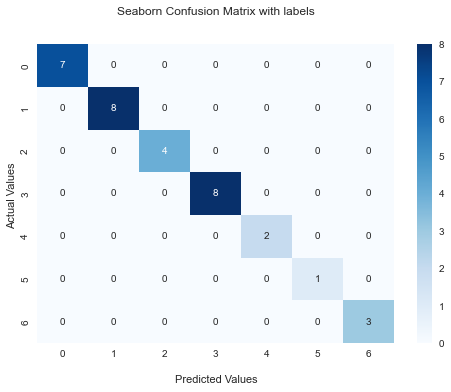

In [157]:
cf=metrics.confusion_matrix(y_test,final_svm.predict(x_test))
print(metrics.classification_report(y_test, final_svm.predict(x_test),digits=3))

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



## Display the visualization of the Confusion Matrix.
plt.show()

### Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression

In [161]:
model=LogisticRegression(max_iter=5000)

In [162]:
parameters={'max_iter':[100,200,300,400,500],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gs=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=3,n_jobs=cpus)
gs.fit(x_train,y_train)
print(gs.best_estimator_)
print(gs.best_score_)

LogisticRegression(solver='saga')
0.9848484848484849


C:\Users\GAGAN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [163]:
final_model=LogisticRegression(max_iter=300,solver='sag',random_state=0)
scores=cross_val_score(model,x_train,y_train,cv=3)
final_model.fit(x_train,y_train)

C:\Users\GAGAN\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=300, random_state=0, solver='sag')

In [164]:
print(scores,scores.mean())
cross_val_scores['Logistic Regression']=scores.mean()

[1.         0.95454545 0.95454545] 0.9696969696969697


In [165]:
print(final_model.score(x_train,y_train))
print(final_model.score(x_test,y_test))

0.9696969696969697
1.0


              precision    recall  f1-score   support

         1.0      1.000     1.000     1.000         7
         2.0      1.000     1.000     1.000         8
         3.0      1.000     1.000     1.000         4
         4.0      1.000     1.000     1.000         8
         5.0      1.000     1.000     1.000         2
         6.0      1.000     1.000     1.000         1
         7.0      1.000     1.000     1.000         3

    accuracy                          1.000        33
   macro avg      1.000     1.000     1.000        33
weighted avg      1.000     1.000     1.000        33



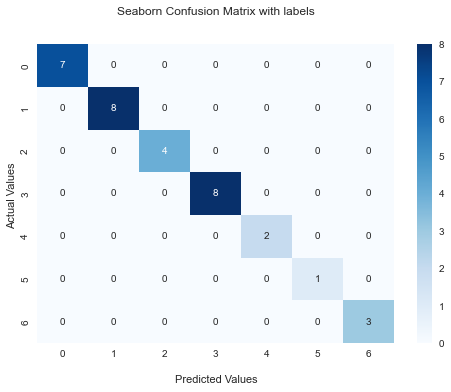

In [166]:
cf=metrics.confusion_matrix(y_test,final_model.predict(x_test))
print(metrics.classification_report(y_test, final_model.predict(x_test),digits=3))

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



## Display the visualization of the Confusion Matrix.
plt.show()

### DECISION TREE

In [167]:
from sklearn import tree

In [168]:
parameters={'criterion':['entropy','gini','log_loss'],'max_depth':[2,3,4,5],'min_samples_leaf':[5,10,15,20],'max_leaf_nodes':[3,4,5,6,7,8,10,11,12]}

In [169]:
model=tree.DecisionTreeClassifier()
gs=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=3,n_jobs=cpus)
gs.fit(x_train,y_train)

C:\Users\GAGAN\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.57575758 0.57575758 0.40909091 0.37878788 0.71212121 0.62121212
 0.40909091 0.37878788 0.71212121 0.62121212 0.40909091 0.37878788
 0.71212121 0.62121212 0.40909091 0.37878788 0.71212121 0.62121212
 0.40909091 0.37878788 0.71212121 0.62121212 0.40909091 0.37878788
 0.71212121 0.62121212 0.40909091 0.37878788 0.71212121 0.62121212
 0.40909091 0.37878788 0.71212121 0.62121212 0.40909091 0.37878788
 0.57575758 0.57575758 0.40909091 0.37878788 0.71212121 0.62121212
 0.40909091 0.37878788 0.84848485 0.62121212 0.40909091 0.37878788
 0.89393939 0.62121212 0.40909091 0.37878788 0.87878788 0.62121212
 0.40909091 0.37878788 0.89393939 0.62121212 0.40909091 0.37878788
 0.89393939 0.62121212 0.40909091 0.37878788 0.87878788 0.62121212
 0.40909091 0.37878788 0.89393939 0.62121212 0.40909091 0.37878788
 0.57575758 0.57575758 0.40909091 0.37878788 0.712121

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'min_samples_leaf': [5, 10, 15, 20]},
             scoring='accuracy')

In [170]:
gs.best_score_

0.893939393939394

In [171]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 5}

In [172]:
final_model=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,max_leaf_nodes=6,min_samples_leaf=5,random_state=0)
scores=cross_val_score(final_model,x_train,y_train,cv=3)
print(scores,scores.mean())
cross_val_scores['Decision Tree']=scores.mean()

[0.90909091 0.90909091 0.81818182] 0.8787878787878788


In [173]:
final_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=6,
                       min_samples_leaf=5, random_state=0)

In [174]:
print(final_model.score(x_train,y_train))
print(final_model.score(x_test,y_test))

0.9393939393939394
0.9090909090909091


[Text(620.0, 951.3000000000001, 'Phosphorous <= -0.145\nentropy = 2.692\nsamples = 66\nvalue = [15, 10, 10, 9, 5, 13, 4]\nclass = Urea'),
 Text(372.0, 679.5, 'Nitrogen <= 0.544\nentropy = 1.608\nsamples = 34\nvalue = [15, 0, 0, 0, 5, 13, 1]\nclass = Urea'),
 Text(248.0, 407.70000000000005, 'Potassium <= 0.301\nentropy = 1.105\nsamples = 19\nvalue = [0, 0, 0, 0, 5, 13, 1]\nclass = 20-20'),
 Text(124.0, 135.89999999999998, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 0, 0, 13, 0]\nclass = 20-20'),
 Text(372.0, 135.89999999999998, 'entropy = 0.65\nsamples = 6\nvalue = [0, 0, 0, 0, 5, 0, 1]\nclass = 17-17-17'),
 Text(496.0, 407.70000000000005, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0, 0, 0, 0, 0, 0]\nclass = Urea'),
 Text(868.0, 679.5, 'Potassium <= 0.033\nentropy = 1.884\nsamples = 32\nvalue = [0, 10, 10, 9, 0, 0, 3]\nclass = DAP'),
 Text(744.0, 407.70000000000005, 'Phosphorous <= 0.925\nentropy = 0.998\nsamples = 19\nvalue = [0, 10, 0, 9, 0, 0, 0]\nclass = DAP'),
 Text(620.0, 135.

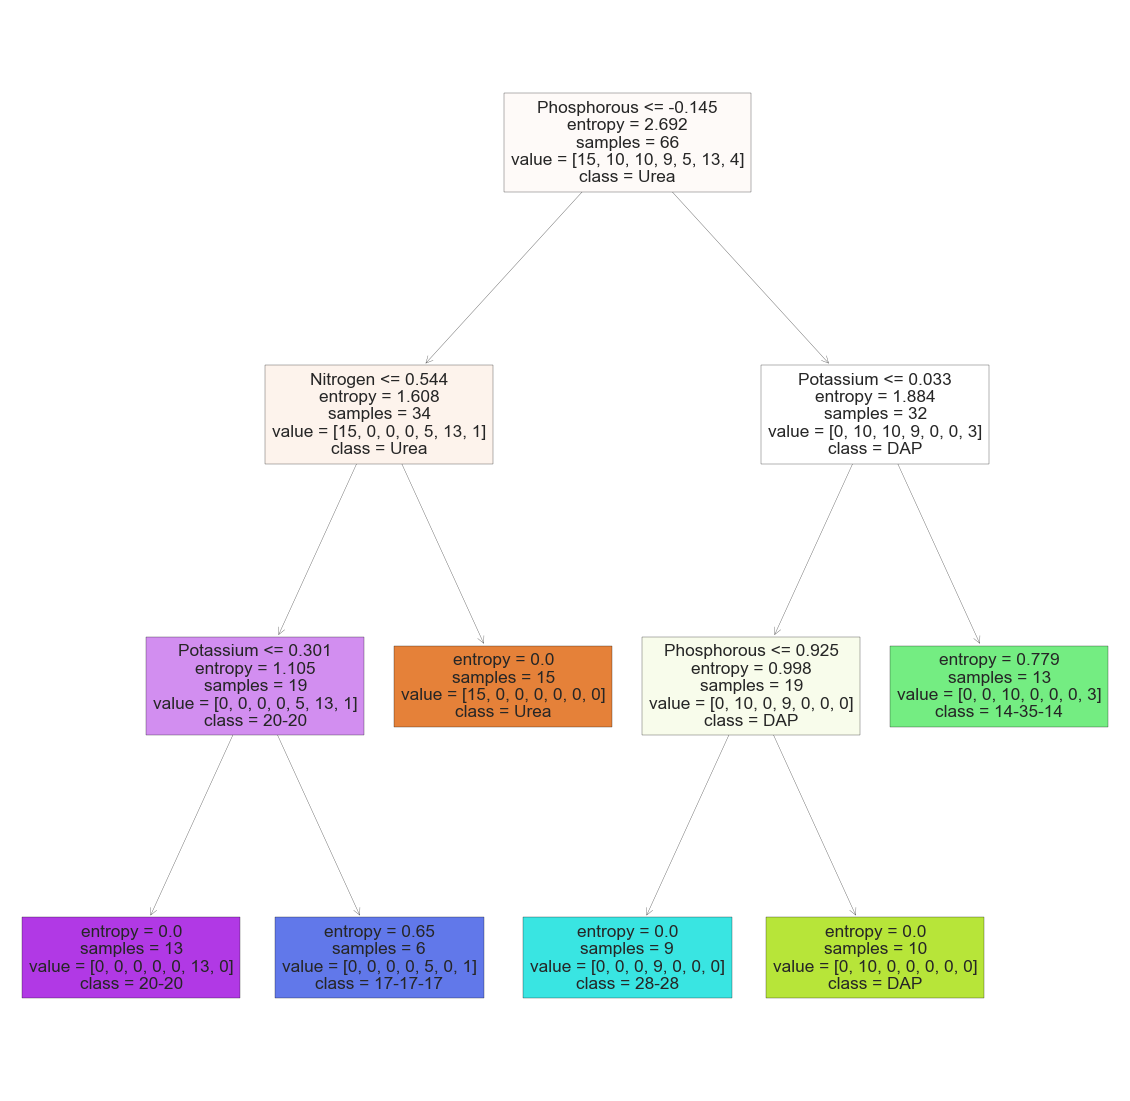

In [175]:
plt.figure(figsize=(20,20))
features=['Crop Type','Nitrogen','Potassium','Phosphorous']
tree.plot_tree(final_model,feature_names=features,class_names=list(dict_fertilizer.keys()),filled=True)

C:\Users\GAGAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GAGAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GAGAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0      1.000     1.000     1.000         7
         2.0      1.000     1.000     1.000         8
         3.0      0.571     1.000     0.727         4
         4.0      1.000     1.000     1.000         8
         5.0      1.000     1.000     1.000         2
         6.0      1.000     1.000     1.000         1
         7.0      0.000     0.000     0.000         3

    accuracy                          0.909        33
   macro avg      0.796     0.857     0.818        33
weighted avg      0.857     0.909     0.876        33



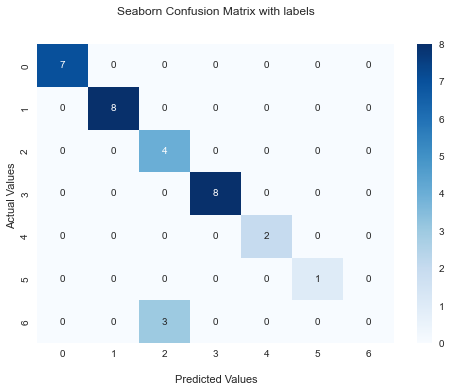

In [176]:
cf=metrics.confusion_matrix(y_test,final_model.predict(x_test))
print(metrics.classification_report(y_test, final_model.predict(x_test),digits=3))

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');



## Display the visualization of the Confusion Matrix.
plt.show()

### Random Forest

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
model=RandomForestClassifier()

In [179]:
parameters={'criterion':['entropy','gini','log_loss'],
            'max_depth':[2,3,4,5],
            'max_leaf_nodes':[3,4,5,6,7,8],
            'n_estimators':[20,40,60,80,100,200,300],
            'max_samples':[1,2,3,4,5,6,7,8]
           }

In [180]:

# gs=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=3,n_jobs=cpus)
# gs.fit(x_train,y_train)

In [181]:
# print(gs.best_score_)

In [182]:
# print(gs.best_params_)

In [207]:
final_model=RandomForestClassifier(n_estimators=30,bootstrap=True,criterion='entropy',max_leaf_nodes=3,max_samples=1,min_samples_leaf=10)
final_model=RandomForestClassifier(n_estimators=150,random_state=42)
# final_model=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=7,max_leaf_nodes=10,max_samples=8)

In [208]:
final_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [209]:
print(final_model.score(x_train,y_train))
print(final_model.score(x_test,y_test))

1.0
1.0


In [210]:
scores=cross_val_score(final_model,x_train,y_train,cv=3)

In [211]:
print(scores,scores.mean())

[1.         1.         0.95454545] 0.9848484848484849


In [188]:
cross_val_scores['Random Forest']=scores.mean()

In [189]:
print(cross_val_scores)

{'SVM': 0.9696969696969697, 'Logistic Regression': 0.9696969696969697, 'Decision Tree': 0.8787878787878788, 'Random Forest': 0.9848484848484849, 'Naive Bayes': 0.9696969696969697}


### Naive Bayes

In [190]:
from sklearn.naive_bayes import GaussianNB

In [191]:
model=GaussianNB()


In [192]:
scores=cross_val_score(model,x_train,y_train,cv=3)

In [193]:
print(scores,scores.mean())

[1.         1.         0.90909091] 0.9696969696969697


In [194]:
model.fit(x_train,y_train)

GaussianNB()

In [195]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

1.0
1.0


In [196]:
cross_val_scores['Naive Bayes']=scores.mean()

## Evaluating models

[Text(0, 0, '0.969697'),
 Text(0, 0, '0.969697'),
 Text(0, 0, '0.878788'),
 Text(0, 0, '0.984848'),
 Text(0, 0, '0.969697')]

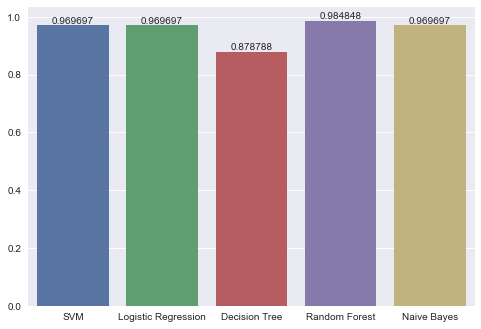

In [197]:
ax=sns.barplot(x=list(cross_val_scores.keys()),y=list(cross_val_scores.values()))
ax.bar_label(ax.containers[0])

In [198]:
cross_val_scores.values()

dict_values([0.9696969696969697, 0.9696969696969697, 0.8787878787878788, 0.9848484848484849, 0.9696969696969697])

## Final Model

In [258]:
final_model=RandomForestClassifier(n_estimators=150,random_state=42)
final_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [259]:
scores=cross_val_score(final_model,x_train,y_train,cv=3)

In [260]:
print(scores,scores.mean())

[1.         1.         0.95454545] 0.9848484848484849


In [261]:
joblib.dump(final_model,'model.pkl')

['model.pkl']

In [224]:
joblib.dump(dict_crop,'dict_crop.pkl')
joblib.dump(dict_fertilizer,'dict_fertilizer.pkl')
joblib.dump(mean_dict,'mean_dict.pkl')
joblib.dump(std_dict,'std_dict.pkl')

['std_dict.pkl']

In [302]:
def predict(inp):
    dict_crop=joblib.load('dict_crop.pkl')
    dict_fertilizer=joblib.load('dict_fertilizer.pkl')
    mean_dict=joblib.load('mean_dict.pkl')
    std_dict=joblib.load('std_dict.pkl')
    
    ## extract input
    
    crop_type=inp['Crop Type']
    Nitrogen=inp['Nitrogen']
    Potassium=inp['Potassium']
    Phosphorous=inp['Phosphorous']
    
    # normalize
    
    x=np.array([dict_crop[crop_type],Nitrogen,Potassium,Phosphorous])
    x=x.astype('float64')
#     print(x)
    for i in range(len(x)):
        x[i]=x[i]-mean_dict[i]
        x[i]=x[i]/std_dict[i]
    test=np.array([x])
#     print(test,test.shape)
    model=joblib.load('model.pkl')
    no=int(model.predict(test))
    rev = {v: k for k, v in dict_fertilizer.items()}
#     print(rev)
#     print(rev[no])
    return rev[no]

    

In [303]:
dict={'Crop Type':'Cotton','Nitrogen':102,'Potassium':19,'Phosphorous':29}
print(predict(dict))

Urea


### Final Testing

In [305]:
data=pd.read_csv("Dataset/fertilizer/Fertilizer Prediction.csv")
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [306]:
data=np.array(data)
for x in data:
    dict={'Crop Type':x[4],'Nitrogen':x[5],'Potassium':x[6],'Phosphorous':x[7]}
    print(x[8],predict(dict))
    

Urea Urea
DAP DAP
14-35-14 14-35-14
28-28 28-28
Urea Urea
17-17-17 17-17-17
20-20 20-20
Urea Urea
28-28 28-28
14-35-14 14-35-14
DAP DAP
17-17-17 17-17-17
Urea Urea
28-28 28-28
DAP DAP
17-17-17 17-17-17
Urea Urea
28-28 28-28
Urea Urea
DAP DAP
20-20 20-20
17-17-17 17-17-17
DAP DAP
Urea Urea
20-20 20-20
28-28 28-28
14-35-14 14-35-14
Urea Urea
DAP DAP
20-20 20-20
28-28 28-28
DAP DAP
Urea Urea
14-35-14 14-35-14
28-28 28-28
Urea Urea
14-35-14 14-35-14
DAP DAP
17-17-17 17-17-17
DAP DAP
20-20 20-20
14-35-14 14-35-14
28-28 28-28
Urea Urea
DAP DAP
14-35-14 14-35-14
20-20 20-20
28-28 28-28
Urea Urea
14-35-14 14-35-14
28-28 28-28
20-20 20-20
Urea Urea
DAP DAP
17-17-17 17-17-17
28-28 28-28
Urea Urea
20-20 20-20
17-17-17 17-17-17
DAP DAP
Urea Urea
20-20 20-20
28-28 28-28
10-26-26 10-26-26
Urea Urea
DAP DAP
20-20 20-20
14-35-14 14-35-14
10-26-26 10-26-26
20-20 20-20
28-28 28-28
Urea Urea
28-28 28-28
Urea Urea
DAP DAP
14-35-14 14-35-14
28-28 28-28
20-20 20-20
10-26-26 10-26-26
DAP DAP
14-35-14 14-35-1